In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import geopandas 
from shapely.geometry import Point

from sklearn.impute import SimpleImputer

from datetime import timedelta
import datetime as dt

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_column',500)
pd.set_option('display.max_row',500)

In [4]:
customers = pd.read_csv('olist_customers_dataset.csv')
geolocation = pd.read_csv('olist_geolocation_dataset.csv')
order_items = pd.read_csv('olist_order_items_dataset.csv')
order_payments = pd.read_csv('olist_order_payments_dataset.csv')
order_reviews = pd.read_csv('olist_order_reviews_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv')
product_category = pd.read_csv('product_category_name_translation.csv')

## Data customers

In [5]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [6]:
customers.shape

(99441, 5)

In [7]:
customers.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [8]:
customers.duplicated().sum()

0

In [9]:
customers['customer_state'].value_counts()

SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_state, dtype: int64

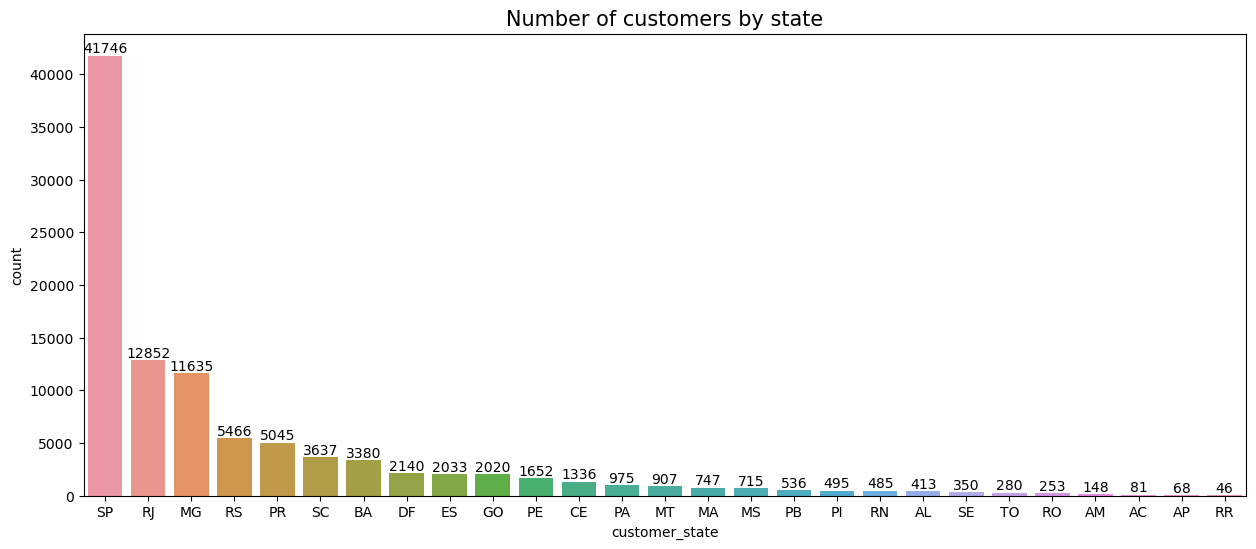

In [10]:
plt.figure(figsize=(15,6))
ax = sns.countplot(customers['customer_state'], order = customers['customer_state'].value_counts().index)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Number of customers by state',fontsize = 15)
plt.show()

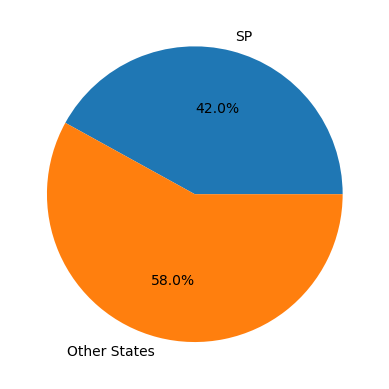

In [11]:
pourcentage = customers["customer_state"].value_counts()["SP"]/len(customers)
x = [pourcentage, 1 - pourcentage]
plt.pie(x, labels=["SP", "Other States"], autopct='%1.1f%%')
plt.show()

## Data geolocation 

In [12]:
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [13]:
geolocation.shape

(1000163, 5)

In [14]:
geolocation.isnull().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [15]:
geolocation.duplicated().sum()

261831

In [16]:
geolocation_lat_lng = geolocation[['geolocation_lat','geolocation_lng']]
geolocation_lat_lng.head()

,geolocation_lat,geolocation_lng
0,-23.545621,-46.639292
1,-23.546081,-46.644820
2,-23.546129,-46.642951
3,-23.544392,-46.639499
4,-23.541578,-46.641607


In [17]:
list(zip(geolocation['geolocation_lat'],geolocation['geolocation_lng']))

[(-23.54562128115268, -46.63929204800168),
 (-23.54608112703553, -46.64482029837157),
 (-23.54612896641469, -46.64295148361138),
 (-23.5443921648681, -46.63949930627844),
 (-23.541577961711493, -46.64160722329613),
 (-23.547762303364262, -46.63536053788448),
 (-23.54627311241268, -46.64122516971552),
 (-23.546923208436723, -46.6342636964915),
 (-23.543769055769133, -46.63427784085132),
 (-23.547639550320632, -46.63603162315495),
 (-23.547325128224376, -46.63418378613892),
 (-23.53841810407414, -46.634778375266734),
 (-23.546435343326205, -46.63383023397196),
 (-23.548945985189437, -46.63467113292871),
 (-23.54518734081604, -46.63785524104107),
 (-23.54608112703553, -46.64482029837157),
 (-23.54188300998332, -46.63991946670314),
 (-23.541389521053937, -46.62989908781218),
 (-23.54693540437998, -46.63658792659698),
 (-23.54588427921401, -46.64316319124004),
 (-23.545165891770928, -46.643785796266464),
 (-23.55223547100232, -46.6284406588955),
 (-23.546690486964888, -46.6354469588072),
 (

In [18]:
geometry = [Point(xy) for xy in zip(geolocation['geolocation_lng'],geolocation['geolocation_lat'])]

In [19]:
gdf = geopandas.GeoDataFrame(geolocation_lat_lng, crs = {'init' : 'epsg:4326'}, geometry = geometry)
gdf.head()

,geolocation_lat,geolocation_lng,geometry
0,-23.545621,-46.639292,POINT (-46.63929 -23.54562)
1,-23.546081,-46.644820,POINT (-46.64482 -23.54608)
2,-23.546129,-46.642951,POINT (-46.64295 -23.54613)
3,-23.544392,-46.639499,POINT (-46.63950 -23.54439)
4,-23.541578,-46.641607,POINT (-46.64161 -23.54158)


In [20]:
countries = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
countries.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


<AxesSubplot:>

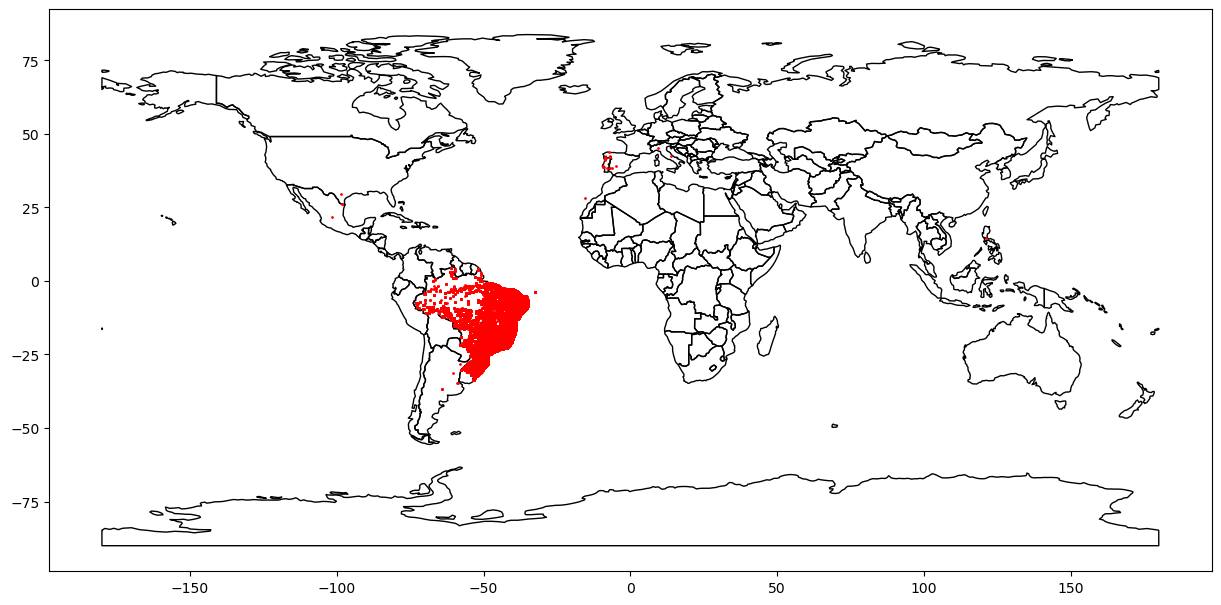

In [21]:
ax = countries.plot(figsize=(15,15), edgecolor = 'black', facecolor = 'none')
gdf.plot(ax = ax , color = 'red', markersize = 1)

## Data order_items 

In [22]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [23]:
order_items.shape

(112650, 7)

In [24]:
order_items.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [25]:
order_items.duplicated().sum()

0

In [26]:
order_items.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


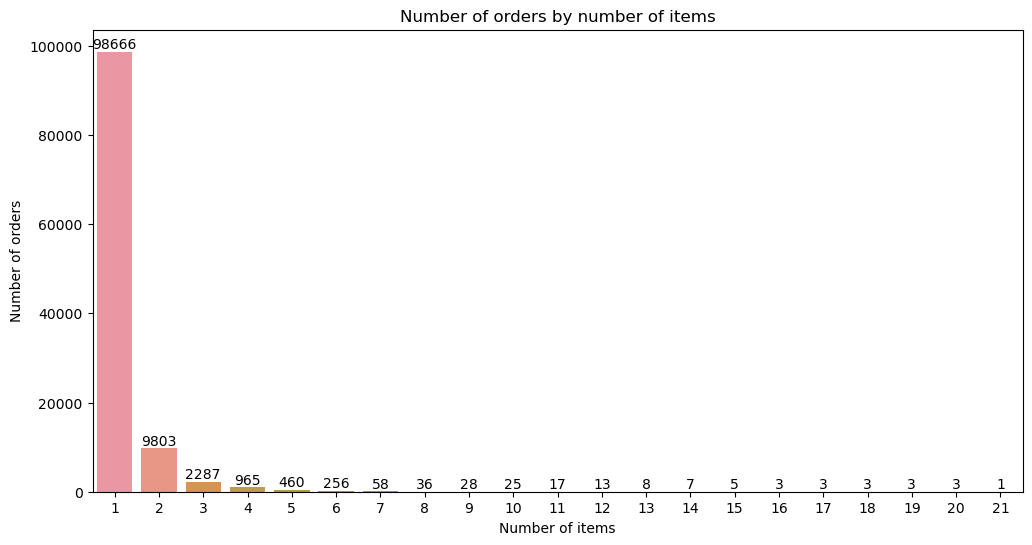

In [27]:
# number of items in 1 order

x = order_items['order_item_id'].value_counts().index
y = order_items['order_item_id'].value_counts().values

plt.figure(figsize=(12,6))
plt.title('Number of orders by number of items')
plt.xlabel('Number of items')
plt.ylabel('Number of orders')
ax = sns.barplot(x,y)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

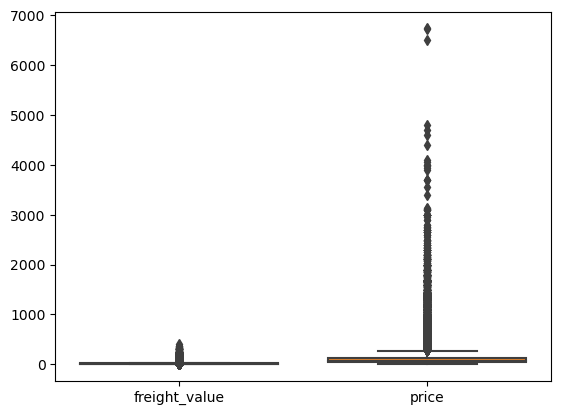

In [28]:
# boxplot of shipping cost and price
sns.boxplot(data=order_items, order=["freight_value", "price"])
plt.show()

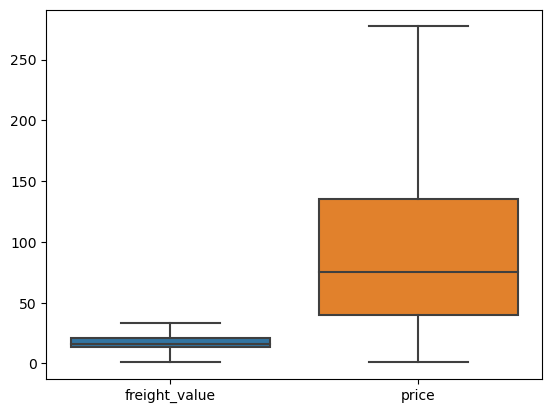

In [29]:
# boxplot of shipping cost and price without outliers
sns.boxplot(data=order_items, order=["freight_value", "price"], showfliers=False)
plt.show()

In [30]:
order_items.loc[order_items['price']>300,'price'].count()

6937

In [31]:
order_items.loc[order_items['freight_value']>40,'freight_value'].count()

7429

## Data order_payments 

In [32]:
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [33]:
order_payments.shape

(103886, 5)

In [34]:
order_payments.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [35]:
order_payments.duplicated().sum()

0

In [36]:
order_payments.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [37]:
order_payments["payment_type"].value_counts()

credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: payment_type, dtype: int64

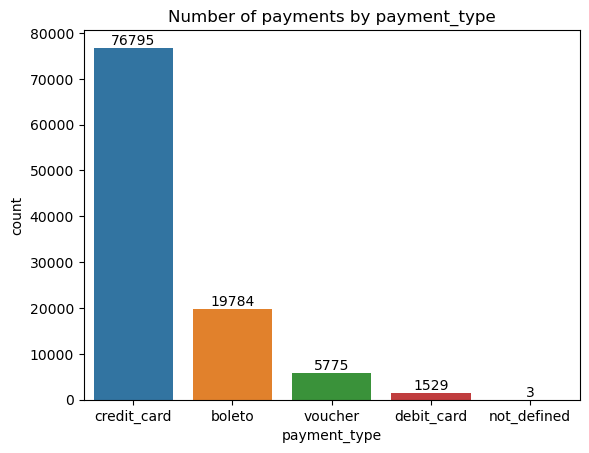

In [38]:
# number of items in 1 order

ax = sns.countplot(order_payments["payment_type"])
for container in ax.containers:
    ax.bar_label(container)
plt.title('Number of payments by payment_type')
plt.show()

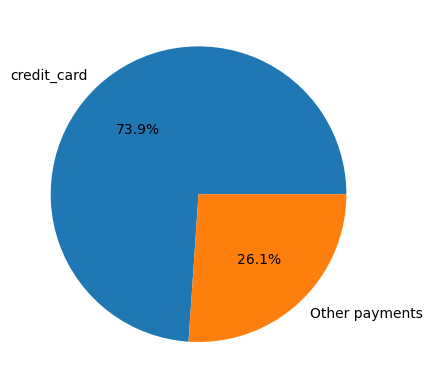

In [39]:
pourcentage = order_payments["payment_type"].value_counts()["credit_card"]/len(order_payments)
x = [pourcentage, 1 - pourcentage]
plt.pie(x, labels=["credit_card", "Other payments"], autopct='%1.1f%%')
plt.show()

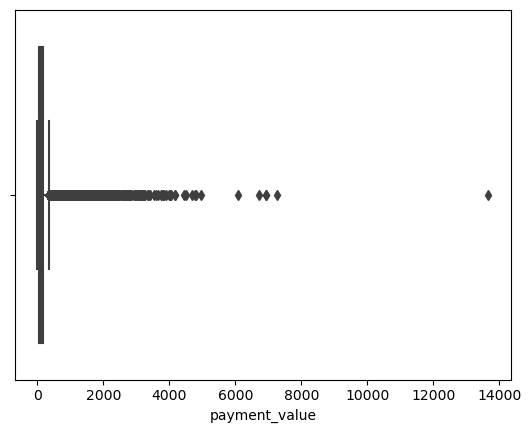

In [40]:
# boxplot of payment_value
sns.boxplot(order_payments["payment_value"])
plt.show()

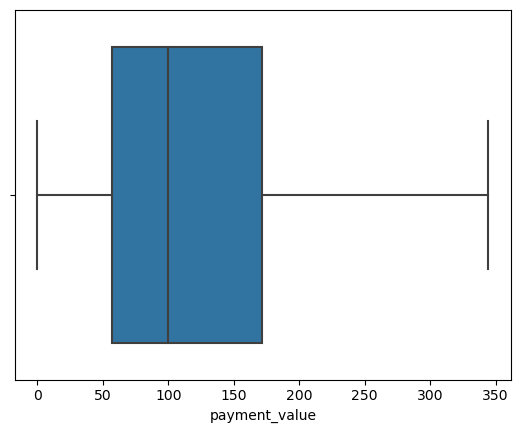

In [41]:
# boxplot of payment_value without outliers
sns.boxplot(order_payments["payment_value"], showfliers = False)
plt.show()

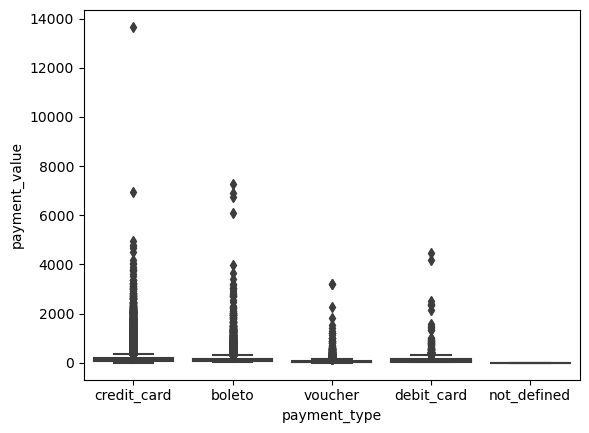

In [42]:
# Boxplot by type of payments
sns.boxplot(data=order_payments, y="payment_value", x="payment_type")
plt.show()

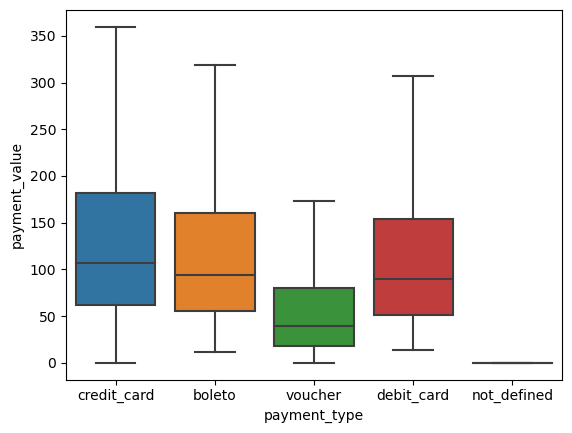

In [43]:
# Boxplot by type of payments without outliers
sns.boxplot(data=order_payments, y="payment_value", x="payment_type", showfliers = False)
plt.show()

In [44]:
order_payments.loc[order_payments['payment_value']> 6000,:]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
34370,736e1922ae60d0d6a89247b851902527,1,boleto,1,7274.88
41419,0812eb902a67711a1cb742b3cdaa65ae,1,credit_card,8,6929.31
49581,fefacc66af859508bf1a7934eab1e97f,1,boleto,1,6922.21
52107,03caa2c082116e1d31e67e9ae3700499,1,credit_card,1,13664.08
62409,2cc9089445046817a7539d90805e6e5a,1,boleto,1,6081.54
85539,f5136e38d1a14a4dbd87dff67da82701,1,boleto,1,6726.66


In [45]:
order_items.loc[order_items['order_id']=='03caa2c082116e1d31e67e9ae3700499',:]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
1647,03caa2c082116e1d31e67e9ae3700499,1,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01
1648,03caa2c082116e1d31e67e9ae3700499,2,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01
1649,03caa2c082116e1d31e67e9ae3700499,3,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01
1650,03caa2c082116e1d31e67e9ae3700499,4,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01
1651,03caa2c082116e1d31e67e9ae3700499,5,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01
1652,03caa2c082116e1d31e67e9ae3700499,6,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01
1653,03caa2c082116e1d31e67e9ae3700499,7,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01
1654,03caa2c082116e1d31e67e9ae3700499,8,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01


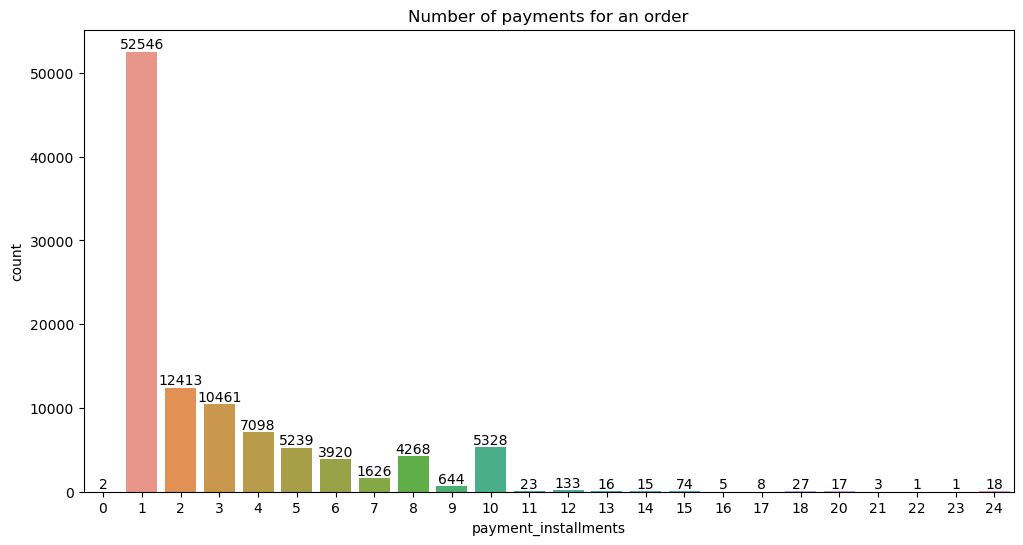

In [46]:
# Number of payments for an order

plt.figure(figsize=(12,6))
ax = sns.countplot(order_payments["payment_installments"])
for container in ax.containers:
    ax.bar_label(container)
plt.title('Number of payments for an order')
plt.show()

## Order_reviews 

In [47]:
order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [48]:
order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [49]:
order_reviews.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [50]:
order_reviews.duplicated().sum()

0

In [51]:
order_reviews['review_score'].value_counts()

5    57328
4    19142
1    11424
3     8179
2     3151
Name: review_score, dtype: int64

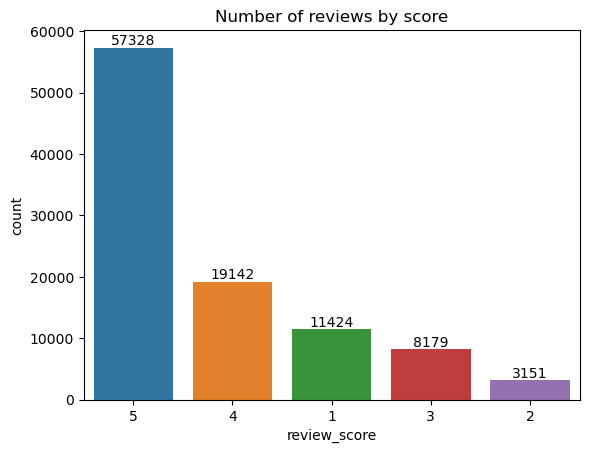

In [52]:
# Number of reviews by score

ax = sns.countplot(order_reviews['review_score'],order = order_reviews['review_score'].value_counts().index)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Number of reviews by score')
plt.show()

In [53]:
# creation variable review_reaction_time

review_creation_date_time = pd.to_datetime(order_reviews['review_creation_date'])
review_answer_timestamp_time = pd.to_datetime(order_reviews['review_answer_timestamp'])

review_reaction_time = review_answer_timestamp_time - review_creation_date_time

# convert to days
review_reaction_time =  review_reaction_time.dt.total_seconds()/(3600*24)

order_reviews['review_reaction_time'] = review_reaction_time

order_reviews.head()


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,review_reaction_time
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,0.907627
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13,1.128623
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24,1.608611
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,0.918125
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53,1.435336


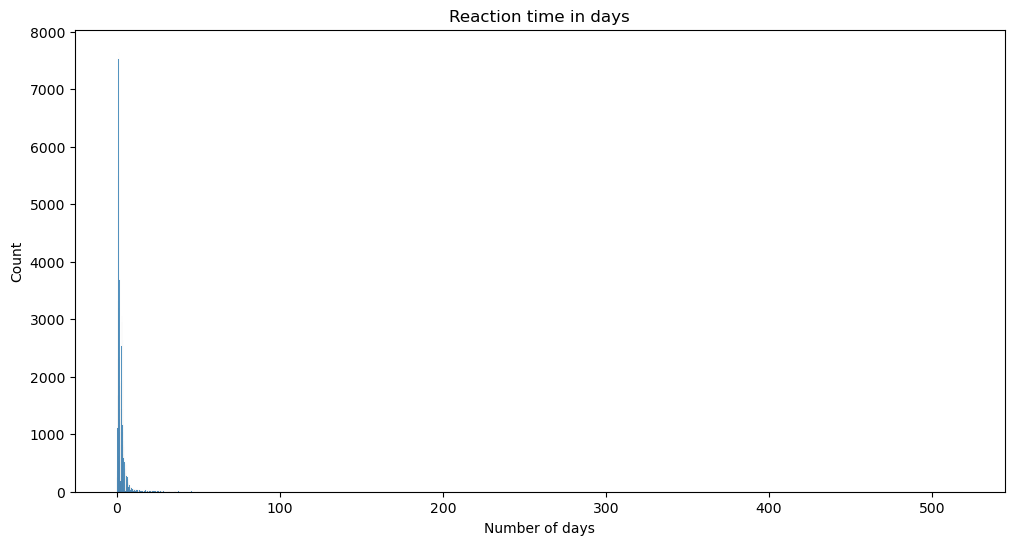

In [54]:
plt.figure(figsize=(12,6))
sns.histplot(review_reaction_time)
plt.xlabel('Number of days')
plt.title('Reaction time in days')
plt.show()

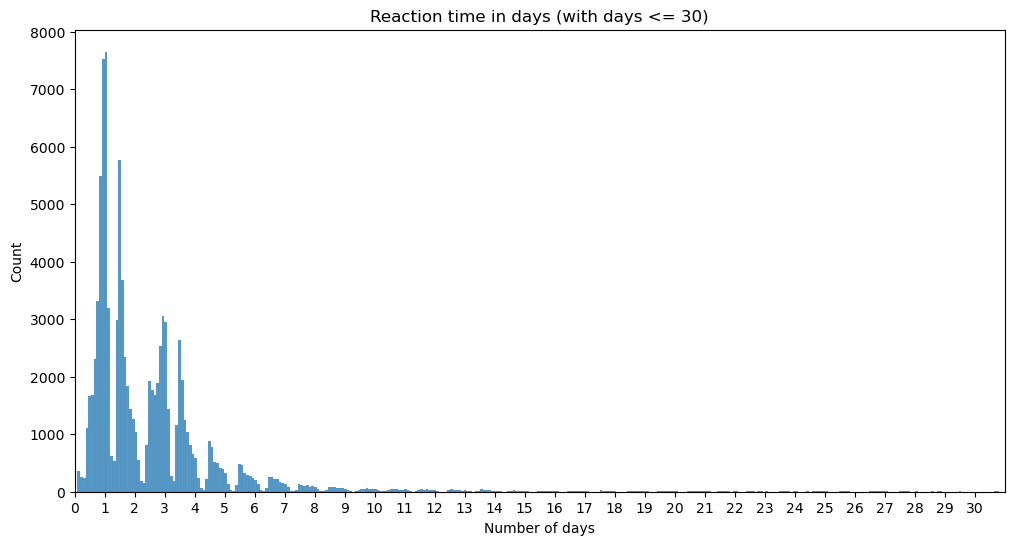

In [55]:
plt.figure(figsize=(12,6))
sns.histplot(review_reaction_time)
plt.xlim([0,31])
plt.xticks(np.arange(0, 31))
plt.xlabel('Number of days')
plt.title('Reaction time in days (with days <= 30)')
plt.show()

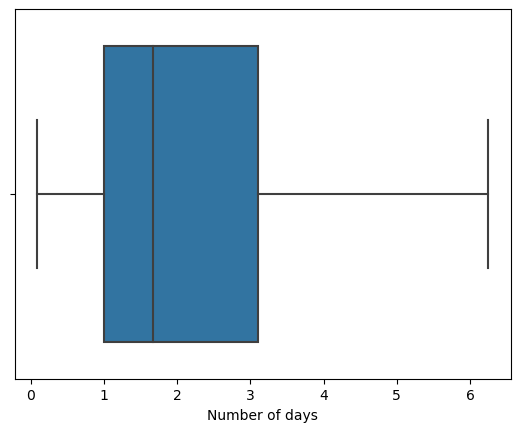

In [56]:
sns.boxplot(review_reaction_time, showfliers = False)
plt.xlabel('Number of days')
plt.show()

## Data orders 

In [57]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [58]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [59]:
orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [60]:
orders.duplicated().sum()

0

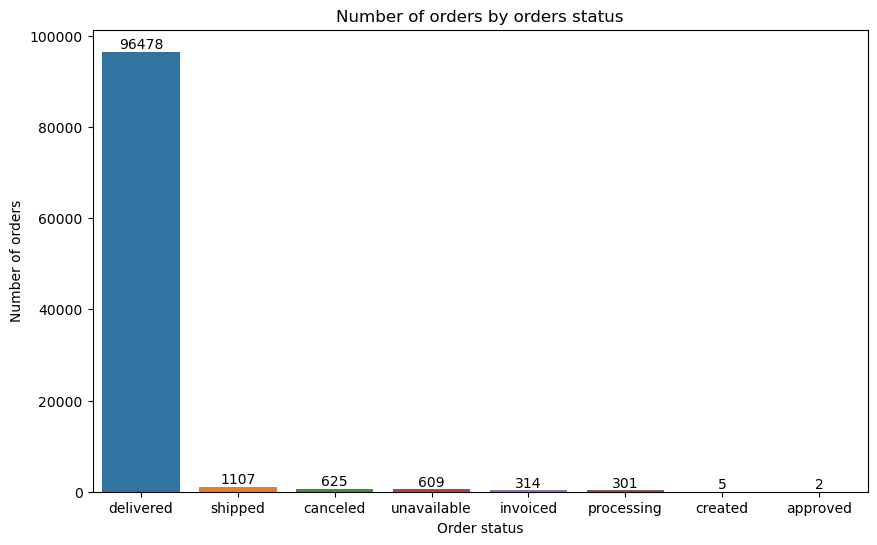

In [61]:
# Number of orders by orders status

x = orders['order_status'].value_counts().index
y = orders['order_status'].value_counts().values

plt.figure(figsize=(10,6))
plt.title('Number of orders by orders status')
plt.xlabel('Order status')
plt.ylabel('Number of orders')
ax = sns.barplot(x,y)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

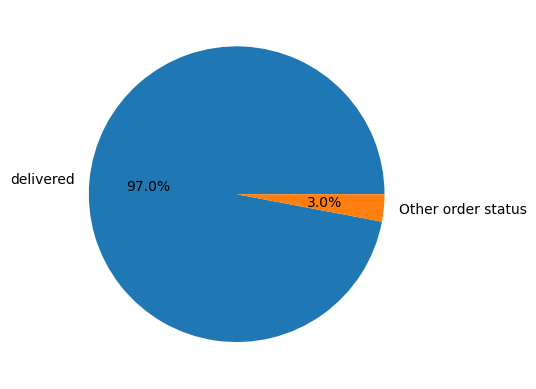

In [62]:
pourcentage = orders["order_status"].value_counts()["delivered"]/len(orders)
x = [pourcentage, 1 - pourcentage]
plt.pie(x, labels=["delivered", "Other order status"], autopct='%1.1f%%')
plt.show()

In [63]:
# convert to datetime
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])

In [64]:
orders.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

In [65]:
orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [66]:
# create variables to see the difference between the estimated and the real delivered order

orders['order_delivered_time'] = orders['order_delivered_customer_date'] - orders['order_approved_at']
orders['order_delivered_time'] = orders['order_delivered_time'].dt.total_seconds() / (3600*24)

orders['order_estimated_time'] = orders['order_estimated_delivery_date'] - orders['order_approved_at']
orders['order_estimated_time'] = orders['order_estimated_time'].dt.total_seconds() / (3600*24)

orders['difference_time_delivery'] = orders['order_estimated_time'] - orders['order_delivered_time']

In [67]:
orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
order_delivered_time             2979
order_estimated_time              160
difference_time_delivery         2979
dtype: int64

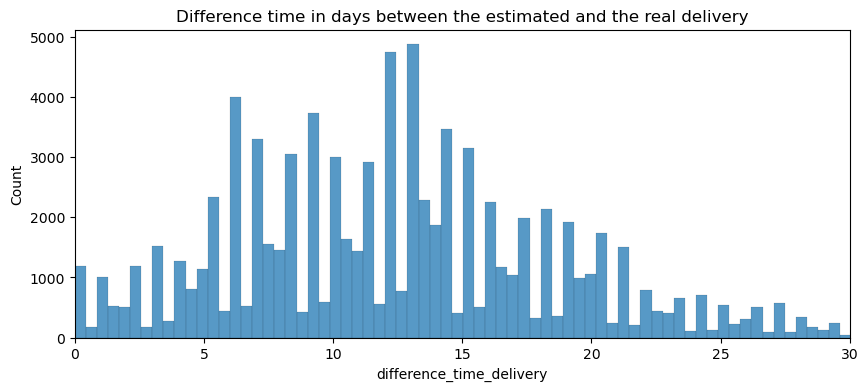

In [68]:
# Delivery estimated time and actual delivery time
plt.figure(figsize=(10, 4))
plt.title('Difference time in days between the estimated and the real delivery')
sns.histplot(orders['difference_time_delivery'])
plt.xlim([0, 30])
plt.show()

## Data products 

In [69]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [70]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [71]:
products.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [72]:
products.duplicated().sum()

0

In [73]:
# create variable volume

products['product_volume_cm3'] = products['product_length_cm'] \
                                * products['product_height_cm'] \
                                * products['product_width_cm']

In [74]:
products.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_volume_cm3
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728,16564.096695
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047,27057.041650
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,168.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000,2880.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000,6840.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000,18480.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,296208.000000


In [75]:
pearson = products.corr(method='pearson')
pearson

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_volume_cm3
product_name_lenght,1.000000,0.098741,0.134321,0.044664,0.080556,-0.016494,0.070741,0.026012
product_description_lenght,0.098741,1.000000,0.108745,0.062445,0.034849,0.063519,-0.030869,0.033678
product_photos_qty,0.134321,0.108745,1.000000,0.036539,0.067447,0.004000,0.026319,0.031643
product_weight_g,0.044664,0.062445,0.036539,1.000000,0.476813,0.563910,0.527597,0.803005
product_length_cm,0.080556,0.034849,0.067447,0.476813,1.000000,0.204889,0.542409,0.542412
product_height_cm,-0.016494,0.063519,0.004000,0.563910,0.204889,1.000000,0.313491,0.712504
product_width_cm,0.070741,-0.030869,0.026319,0.527597,0.542409,0.313491,1.000000,0.639465
product_volume_cm3,0.026012,0.033678,0.031643,0.803005,0.542412,0.712504,0.639465,1.000000


Text(0.5, 1.0, 'Tableau de corrélation de nos variables')

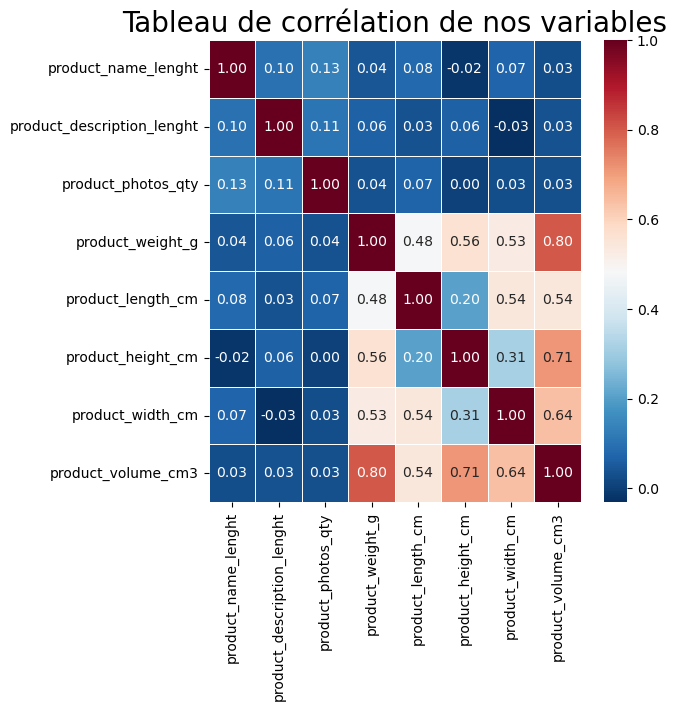

In [76]:
plt.figure(figsize=(6,6))
sns.heatmap(pearson, 
            xticklabels=pearson.columns,
            yticklabels=pearson.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5,
           fmt='.2f')

plt.title('Tableau de corrélation de nos variables',fontsize=20)

In [77]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_volume_cm3
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,2240.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,10800.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,2430.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,2704.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,4420.0


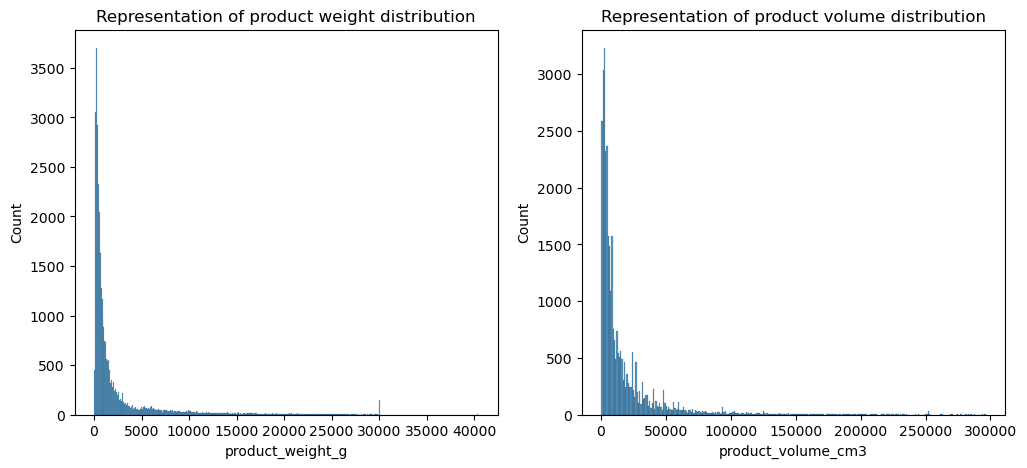

In [78]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(products['product_weight_g'])
plt.title('Representation of product weight distribution')

plt.subplot(1,2,2)
sns.histplot(products['product_volume_cm3'])
plt.title('Representation of product volume distribution')

plt.show()

Text(0.5, 1.0, 'Representation of the weight of the product by its volume')

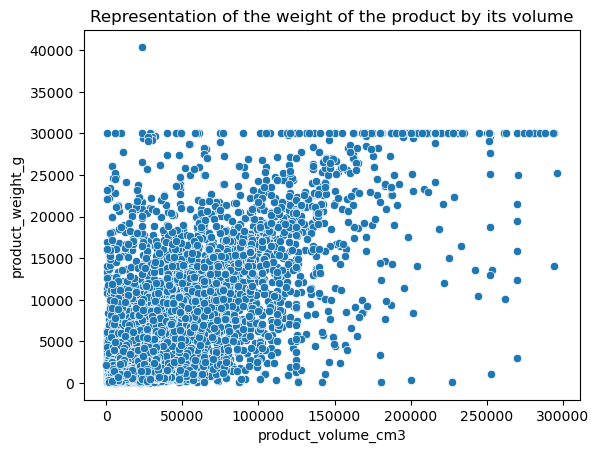

In [79]:
sns.scatterplot(products['product_volume_cm3'],products['product_weight_g'])
plt.title('Representation of the weight of the product by its volume')

## Data sellers 

In [80]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [81]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [82]:
sellers.isnull().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [83]:
sellers.duplicated().sum()

0

In [84]:
sellers['seller_state'].value_counts()

SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
CE      13
PE       9
PB       6
RN       5
MS       5
MT       4
RO       2
SE       2
PI       1
AC       1
MA       1
AM       1
PA       1
Name: seller_state, dtype: int64

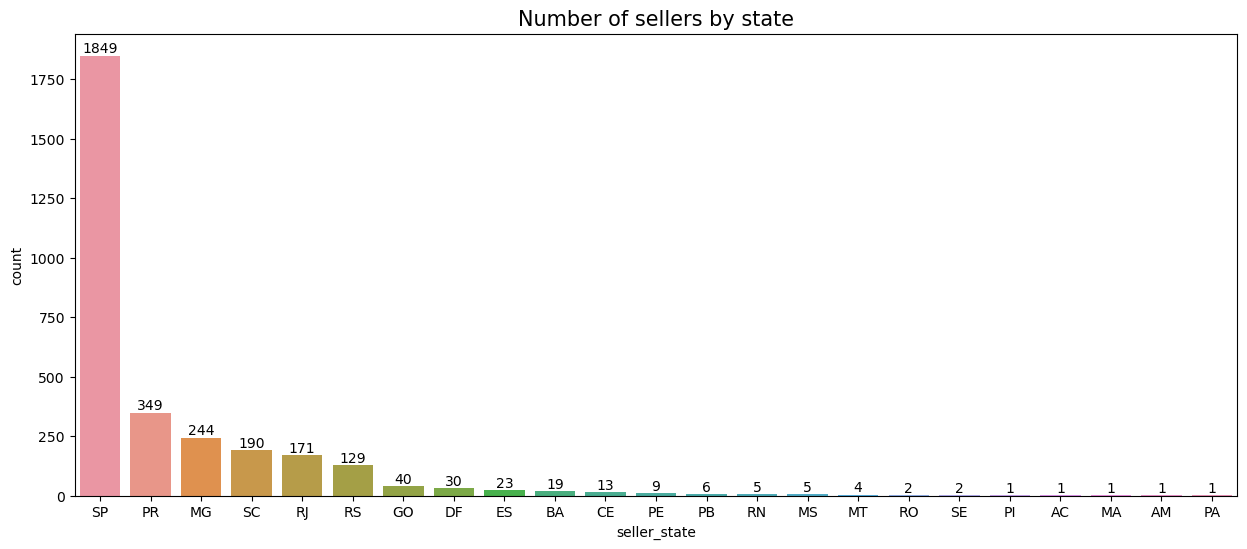

In [85]:
plt.figure(figsize=(15,6))
ax = sns.countplot(sellers['seller_state'], order = sellers['seller_state'].value_counts().index)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Number of sellers by state',fontsize = 15)
plt.show()

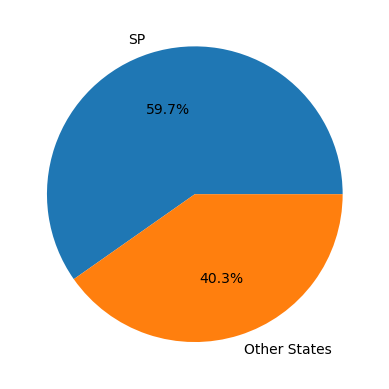

In [86]:
pourcentage = sellers['seller_state'].value_counts()["SP"]/len(sellers)
x = [pourcentage, 1 - pourcentage]
plt.pie(x, labels=["SP", "Other States"], autopct='%1.1f%%')
plt.show()

## Data product_category 

In [87]:
product_category.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [88]:
product_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [89]:
product_category.isnull().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [90]:
product_category.duplicated().sum()

0

## Merge datasets

In [91]:
df = pd.merge(orders, order_reviews, how = 'left', on = 'order_id')
df = pd.merge(df, order_payments, how = 'left', on = 'order_id')
df = pd.merge(df, order_items, how = 'left', on = 'order_id')
df = pd.merge(df, products, how = 'left', on = 'product_id')
df = pd.merge(df, product_category, how = 'left', on = 'product_category_name')
df = pd.merge(df, customers, how = 'left', on = 'customer_id')
df = pd.merge(df, sellers, how = 'left', on = 'seller_id')

In [92]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_delivered_time,order_estimated_time,difference_time_delivery,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,review_reaction_time,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_volume_cm3,product_category_name_english,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.429144,15.536632,7.107488,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1.155417,1.0,credit_card,1.0,18.12,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,1976.0,housewares,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350.0,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.429144,15.536632,7.107488,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1.155417,3.0,voucher,1.0,2.00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,1976.0,housewares,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350.0,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.429144,15.536632,7.107488,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1.155417,2.0,voucher,1.0,18.59,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,1976.0,housewares,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350.0,maua,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,12.502292,17.858021,5.355729,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,0.776273,1.0,boleto,1.0,141.46,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,4693.0,perfumery,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,31570.0,belo horizonte,SP
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.382708,26.628206,17.245498,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58,4.797199,1.0,credit_card,3.0,179.12,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,9576.0,auto,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,14840.0,guariba,SP


In [93]:
df.describe()

,order_delivered_time,order_estimated_time,difference_time_delivery,review_score,review_reaction_time,payment_sequential,payment_installments,payment_value,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_volume_cm3,customer_zip_code_prefix,seller_zip_code_prefix
count,115707.000000,118966.000000,115707.000000,118146.000000,118146.000000,119140.000000,119140.000000,119140.000000,118310.000000,118310.000000,118310.000000,116601.000000,116601.000000,116601.000000,118290.000000,118290.000000,118290.000000,118290.000000,118290.000000,119143.000000,118310.000000
mean,12.053325,23.424473,11.350485,4.015582,3.154695,1.094737,2.941246,172.735135,1.196543,120.646603,20.032387,48.767498,785.967822,2.205161,2112.250740,30.265145,16.619706,23.074799,15377.911717,35033.451298,24442.410413
std,9.415870,8.894700,10.165838,1.400436,9.859116,0.730141,2.777848,267.776077,0.699489,184.109691,15.836850,10.033540,652.584121,1.717452,3786.695111,16.189367,13.453584,11.749139,23653.628887,29823.198969,27573.004511
min,-6.989653,-145.637245,-188.975081,1.000000,0.089225,1.000000,0.000000,0.000000,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,168.000000,1003.000000,1001.000000
25%,6.297205,18.059502,6.505521,4.000000,1.006007,1.000000,1.000000,60.850000,1.000000,39.900000,13.080000,42.000000,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000,2856.000000,11250.000000,6429.000000
50%,9.828600,22.820041,12.056412,5.000000,1.679381,1.000000,2.000000,108.160000,1.000000,74.900000,16.280000,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,6600.000000,24240.000000,13660.000000
75%,15.053808,28.142251,16.315006,5.000000,3.112639,1.000000,4.000000,189.240000,1.000000,134.900000,21.180000,57.000000,983.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,18502.000000,58475.000000,27972.000000
max,208.500972,153.576030,146.016123,5.000000,518.699213,29.000000,24.000000,13664.080000,21.000000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,296208.000000,99990.000000,99730.000000


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119143 entries, 0 to 119142
Data columns (total 45 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       119143 non-null  object        
 1   customer_id                    119143 non-null  object        
 2   order_status                   119143 non-null  object        
 3   order_purchase_timestamp       119143 non-null  datetime64[ns]
 4   order_approved_at              118966 non-null  datetime64[ns]
 5   order_delivered_carrier_date   117057 non-null  datetime64[ns]
 6   order_delivered_customer_date  115722 non-null  datetime64[ns]
 7   order_estimated_delivery_date  119143 non-null  datetime64[ns]
 8   order_delivered_time           115707 non-null  float64       
 9   order_estimated_time           118966 non-null  float64       
 10  difference_time_delivery       115707 non-null  float64       
 11  

In [95]:
df.isnull().sum().sort_values()

order_id                              0
customer_unique_id                    0
customer_city                         0
order_estimated_delivery_date         0
customer_state                        0
customer_zip_code_prefix              0
order_purchase_timestamp              0
order_status                          0
customer_id                           0
payment_installments                  3
payment_sequential                    3
payment_type                          3
payment_value                         3
order_approved_at                   177
order_estimated_time                177
freight_value                       833
price                               833
shipping_limit_date                 833
seller_id                           833
product_id                          833
seller_city                         833
seller_zip_code_prefix              833
order_item_id                       833
seller_state                        833
product_volume_cm3                  853


In [96]:
columns_deleted = ['customer_zip_code_prefix',
                  'seller_zip_code_prefix','seller_id',
                  'seller_state','review_id',
                  'product_name_lenght','product_description_lenght',
                  'product_photos_qty','product_category_name',
                  'review_comment_message','review_comment_title',
                  'order_item_id','product_id','seller_city' ]

In [97]:
df.drop(columns = columns_deleted, inplace = True)

In [98]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_delivered_time,order_estimated_time,difference_time_delivery,review_score,review_creation_date,review_answer_timestamp,review_reaction_time,payment_sequential,payment_type,payment_installments,payment_value,shipping_limit_date,price,freight_value,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_volume_cm3,product_category_name_english,customer_unique_id,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.429144,15.536632,7.107488,4.0,2017-10-11 00:00:00,2017-10-12 03:43:48,1.155417,1.0,credit_card,1.0,18.12,2017-10-06 11:07:15,29.99,8.72,500.0,19.0,8.0,13.0,1976.0,housewares,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.429144,15.536632,7.107488,4.0,2017-10-11 00:00:00,2017-10-12 03:43:48,1.155417,3.0,voucher,1.0,2.00,2017-10-06 11:07:15,29.99,8.72,500.0,19.0,8.0,13.0,1976.0,housewares,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.429144,15.536632,7.107488,4.0,2017-10-11 00:00:00,2017-10-12 03:43:48,1.155417,2.0,voucher,1.0,18.59,2017-10-06 11:07:15,29.99,8.72,500.0,19.0,8.0,13.0,1976.0,housewares,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,12.502292,17.858021,5.355729,4.0,2018-08-08 00:00:00,2018-08-08 18:37:50,0.776273,1.0,boleto,1.0,141.46,2018-07-30 03:24:27,118.70,22.76,400.0,19.0,13.0,19.0,4693.0,perfumery,af07308b275d755c9edb36a90c618231,barreiras,BA
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.382708,26.628206,17.245498,5.0,2018-08-18 00:00:00,2018-08-22 19:07:58,4.797199,1.0,credit_card,3.0,179.12,2018-08-13 08:55:23,159.90,19.22,420.0,24.0,19.0,21.0,9576.0,auto,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO


In [99]:
df.isnull().sum().sort_values()

order_id                            0
customer_unique_id                  0
customer_city                       0
order_estimated_delivery_date       0
customer_state                      0
customer_id                         0
order_purchase_timestamp            0
order_status                        0
payment_installments                3
payment_value                       3
payment_type                        3
payment_sequential                  3
order_estimated_time              177
order_approved_at                 177
freight_value                     833
shipping_limit_date               833
price                             833
product_volume_cm3                853
product_width_cm                  853
product_height_cm                 853
product_length_cm                 853
product_weight_g                  853
review_creation_date              997
review_reaction_time              997
review_answer_timestamp           997
review_score                      997
order_delive

In [100]:
# replace null values for order_approved_at
df.loc[df['order_approved_at'].isnull(),'order_approved_at'] = df['order_purchase_timestamp']

# order_delivered_time
print(df['order_delivered_time'].mean())

# order_estimated_time
print(df['order_estimated_time'].mean())



12.053324990000908
23.42447265560545


In [101]:
df.loc[df['order_delivered_customer_date'].isnull(),'order_delivered_customer_date'] = \
    df['order_approved_at'] + dt.timedelta(days=12)

In [102]:
temp = df['order_delivered_carrier_date'] - df['order_approved_at']
temps = temp.dt.total_seconds() / (3600*24)
temp.mean()

Timedelta('2 days 20:33:29.126681872')

In [103]:
df.loc[df['order_delivered_carrier_date'].isnull(),'order_delivered_carrier_date'] = \
    df['order_approved_at'] + dt.timedelta(days=3)

In [104]:
df['order_delivered_time'] = df['order_delivered_customer_date'] - df['order_approved_at']
df['order_delivered_time'] = df['order_delivered_time'].dt.total_seconds() / (3600*24)

df['order_estimated_time'] = df['order_estimated_delivery_date'] - df['order_approved_at']
df['order_estimated_time'] = df['order_estimated_time'].dt.total_seconds() / (3600*24)

df['difference_time_delivery'] = df['order_estimated_time'] - df['order_delivered_time']

In [107]:
numerical_columns_imputer = ['product_weight_g','product_length_cm',
                  'product_height_cm','product_width_cm',
                  'payment_value','payment_installments',
                  'payment_sequential','price','freight_value',
                  'review_reaction_time','review_score']

df[numerical_columns_imputer] = SimpleImputer(strategy='median').fit_transform(df[numerical_columns_imputer])

categorical_columns_imputer = ['product_category_name_english','payment_type',
                              'shipping_limit_date','review_creation_date',
                              'review_answer_timestamp']

df[categorical_columns_imputer] = SimpleImputer(strategy='most_frequent').fit_transform(df[categorical_columns_imputer])

In [109]:
df['product_volume_cm3'] = df['product_length_cm'] \
                            * df['product_height_cm'] \
                            * df['product_width_cm']

In [110]:
df.isnull().sum().sort_values()

order_id                         0
customer_unique_id               0
product_category_name_english    0
product_volume_cm3               0
product_width_cm                 0
product_height_cm                0
product_length_cm                0
product_weight_g                 0
freight_value                    0
price                            0
shipping_limit_date              0
payment_value                    0
payment_installments             0
payment_type                     0
customer_city                    0
payment_sequential               0
review_answer_timestamp          0
review_creation_date             0
review_score                     0
difference_time_delivery         0
order_estimated_time             0
order_delivered_time             0
order_estimated_delivery_date    0
order_delivered_customer_date    0
order_delivered_carrier_date     0
order_approved_at                0
order_purchase_timestamp         0
order_status                     0
customer_id         

In [111]:
df.shape

(119143, 31)

In [114]:
df['order_status'].value_counts()

delivered      115723
shipped          1256
canceled          750
unavailable       652
invoiced          378
processing        376
created             5
approved            3
Name: order_status, dtype: int64

In [115]:
df.drop(df[(df['order_status'] == 'canceled') | (df['order_status'] == 'unavailable')].index, inplace=True)

In [116]:
df.shape

(117741, 31)

In [117]:
df.to_csv('olist_data.csv')